## **Python Project: Data Analysis of Snapchat Using Pandas & Matplotlib**


1. Upload Dataset in Google Colab

In [ ]:
%%bash
cat > snapchat_data.csv <<'CSV'
user_id,age,gender,daily_snaps,snap_score,time_spent_minutes,stories_viewed
101,18,M,22,1200,45,30
102,20,F,35,2200,70,40
103,17,F,15,900,30,20
104,19,M,40,3000,85,55
105,21,F,28,2500,60,38
106,22,M,12,700,25,18
107,18,F,32,2100,55,33
108,20,M,20,1300,40,25
109,21,F,45,3500,90,60
110,19,M,30,1800,50,28
CSV
ls -l snapchat_data.csv


-rw-r--r-- 1 root root 304 Nov 30 11:59 snapchat_data.csv


2. Import libraries & load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("snapchat_data.csv")
df.head()


,user_id,age,gender,daily_snaps,snap_score,time_spent_minutes,stories_viewed
0,101,18,M,22,1200,45,30
1,102,20,F,35,2200,70,40
2,103,17,F,15,900,30,20
3,104,19,M,40,3000,85,55
4,105,21,F,28,2500,60,38


Explation: .pandas (pd) → used for loading, cleaning, and analyzing data

.numpy (np) → used for numerical calculations

.matplotlib.pyplot (plt) → used to create graphs and charts

These three libraries are the basic tools for data analysis in Python.

3. Inspect dataset (shape, types, missing)

In [ ]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nDescribe (numeric):")
df.describe()


Shape: (10, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10 non-null     int64 
 1   age                 10 non-null     int64 
 2   gender              10 non-null     object
 3   daily_snaps         10 non-null     int64 
 4   snap_score          10 non-null     int64 
 5   time_spent_minutes  10 non-null     int64 
 6   stories_viewed      10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 692.0+ bytes

Describe (numeric):


,user_id,age,daily_snaps,snap_score,time_spent_minutes,stories_viewed
count,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,105.50000,19.500000,27.90000,1920.000000,55.000000,34.700000
std,3.02765,1.581139,10.68176,916.272643,21.730675,13.944732
min,101.00000,17.000000,12.00000,700.000000,25.000000,18.000000
25%,103.25000,18.250000,20.50000,1225.000000,41.250000,25.750000
50%,105.50000,19.500000,29.00000,1950.000000,52.500000,31.500000
75%,107.75000,20.750000,34.25000,2425.000000,67.500000,39.500000
max,110.00000,22.000000,45.00000,3500.000000,90.000000,60.000000


Explanation

df.shape → shows total rows and columns of the dataset.

df.info() → shows column names, data types, and missing values.

df.describe() → gives basic statistics (mean, min, max, etc.) for numeric columns.

4. Clean & prepare (rename columns, convert types)


In [ ]:

df.columns = [c.strip().lower() for c in df.columns]


numeric_cols = ["daily_snaps","snap_score","time_spent_minutes","stories_viewed","age"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


print("Missing values:\n", df.isna().sum())


df = df.dropna().reset_index(drop=True)
df.head()


Missing values:
 user_id               0
age                   0
gender                0
daily_snaps           0
snap_score            0
time_spent_minutes    0
stories_viewed        0
dtype: int64


,user_id,age,gender,daily_snaps,snap_score,time_spent_minutes,stories_viewed
0,101,18,M,22,1200,45,30
1,102,20,F,35,2200,70,40
2,103,17,F,15,900,30,20
3,104,19,M,40,3000,85,55
4,105,21,F,28,2500,60,38


 Explanation:
 df.columns = [c.strip().lower() for c in df.columns] → cleans column names (lowercase + no spaces).

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') → converts selected columns to numeric.

df.isna().sum() → counts missing values.

df = df.dropna().reset_index(drop=True) → removes rows with missing data.

df.head() → shows first 5 rows

5. Basic aggregations & group summaries

In [ ]:

age_time = df.groupby("age")["time_spent_minutes"].mean().reset_index()
print(age_time)


gender_snaps = df.groupby("gender")["daily_snaps"].mean().reset_index()
print(gender_snaps)


top_scores = df.sort_values("snap_score", ascending=False).head(5)
top_scores


   age  time_spent_minutes
0   17                30.0
1   18                50.0
2   19                67.5
3   20                55.0
4   21                75.0
5   22                25.0
  gender  daily_snaps
0      F         31.0
1      M         24.8


,user_id,age,gender,daily_snaps,snap_score,time_spent_minutes,stories_viewed
8,109,21,F,45,3500,90,60
3,104,19,M,40,3000,85,55
4,105,21,F,28,2500,60,38
1,102,20,F,35,2200,70,40
6,107,18,F,32,2100,55,33


Explanation:

age_time = df.groupby("age")["time_spent_minutes"].mean().reset_index()
→ Calculates average time spent for each age group.

gender_snaps = df.groupby("gender")["daily_snaps"].mean().reset_index()
→ Calculates average daily snaps for each gender.

top_scores = df.sort_values("snap_score", ascending=False).head(5)
→ Shows top 5 users with the highest snap score.

6. Correlation matrix (which factors relate to snap_score)

In [ ]:
corr = df[["daily_snaps","snap_score","time_spent_minutes","stories_viewed","age"]].corr()
print(corr)


                    daily_snaps  snap_score  time_spent_minutes  \
daily_snaps            1.000000    0.957239            0.974105   
snap_score             0.957239    1.000000            0.970977   
time_spent_minutes     0.974105    0.970977            1.000000   
stories_viewed         0.935932    0.961437            0.984506   
age                    0.088813    0.222413            0.161690   

                    stories_viewed       age  
daily_snaps               0.935932  0.088813  
snap_score                0.961437  0.222413  
time_spent_minutes        0.984506  0.161690  
stories_viewed            1.000000  0.194016  
age                       0.194016  1.000000  


Explanation

corr = df[["daily_snaps","snap_score","time_spent_minutes","stories_viewed","age"]].corr()
→ Calculates correlation between selected numeric columns.

print(corr)
→ Displays the correlation matrix.

7. Visual: bar chart — avg time spent by age

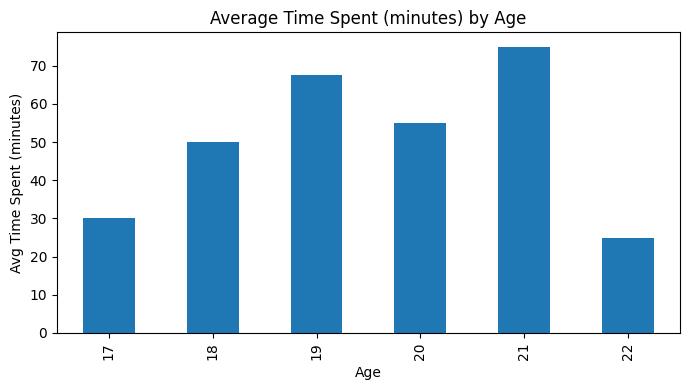

In [ ]:
age_time = df.groupby("age")["time_spent_minutes"].mean()
age_time.plot(kind="bar", figsize=(7,4))
plt.title("Average Time Spent (minutes) by Age")
plt.xlabel("Age")
plt.ylabel("Avg Time Spent (minutes)")
plt.tight_layout()
plt.show()


Explanation:

Groups data by age, calculates average time spent, and plots it as a bar chart with labels and title.

8. Visual: bar chart — avg daily snaps by gender

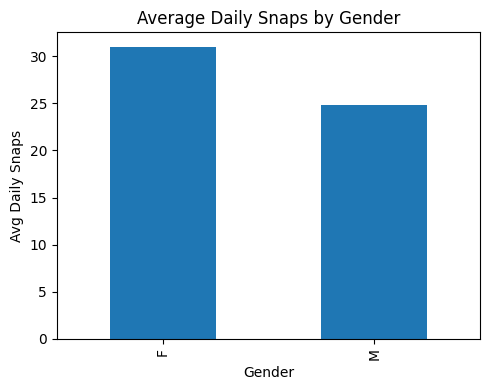

In [ ]:
gender_snaps = df.groupby("gender")["daily_snaps"].mean()
gender_snaps.plot(kind="bar", figsize=(5,4))
plt.title("Average Daily Snaps by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg Daily Snaps")
plt.tight_layout()
plt.show()


Explanation

Groups data by gender, calculates average daily snaps, and plots it as a bar chart with labels and title.

9. Visual: scatter — snap_score vs time spent

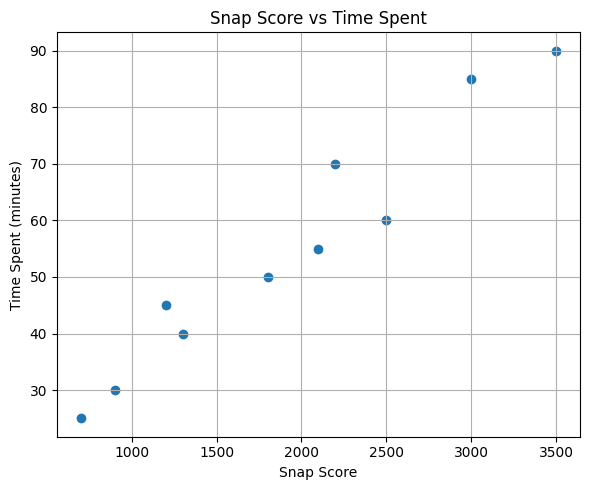

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df["snap_score"], df["time_spent_minutes"])
plt.xlabel("Snap Score")
plt.ylabel("Time Spent (minutes)")
plt.title("Snap Score vs Time Spent")
plt.grid(True)
plt.tight_layout()
plt.show()


Explanation

Plots a scatter plot showing the relationship between snap score and time spent, with labels, title, and grid.

10. Visual: histogram — daily_snaps distribution

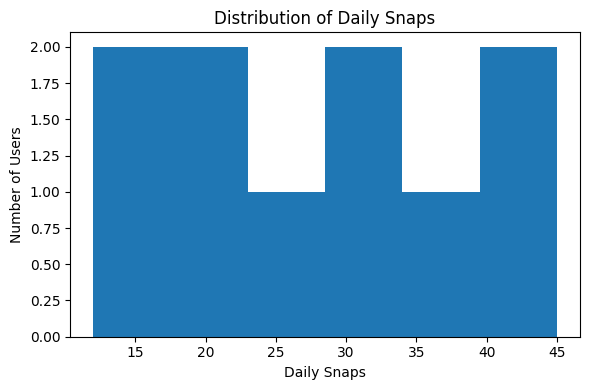

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["daily_snaps"], bins=6)
plt.xlabel("Daily Snaps")
plt.ylabel("Number of Users")
plt.title("Distribution of Daily Snaps")
plt.tight_layout()
plt.show()


Explation

Plots a histogram showing the distribution of daily snaps among users.

11. Simple insight extraction (printable lines)

In [ ]:

most_time_age = df.groupby("age")["time_spent_minutes"].mean().idxmax()
avg_time = df["time_spent_minutes"].mean()
female_avg_snaps = df[df.gender=="F"]["daily_snaps"].mean()
corr_with_score = corr["snap_score"].sort_values(ascending=False)

print(f"Age group that spends most time: {most_time_age}")
print(f"Overall avg time spent (min): {avg_time:.1f}")
print(f"Avg daily snaps (female): {female_avg_snaps:.1f}")
print("\nCorrelation with snap_score:\n", corr_with_score)


Age group that spends most time: 21
Overall avg time spent (min): 55.0
Avg daily snaps (female): 31.0

Correlation with snap_score:
 snap_score            1.000000
time_spent_minutes    0.970977
stories_viewed        0.961437
daily_snaps           0.957239
age                   0.222413
Name: snap_score, dtype: float64


Explanation

Calculates key insights: age spending most time, overall average time, average daily snaps for females, and correlation of all columns with snap score, then prints them.

12. Save key plots & export cleaned data

Saved snapchat_data_cleaned.csv
Saved time_by_age.png


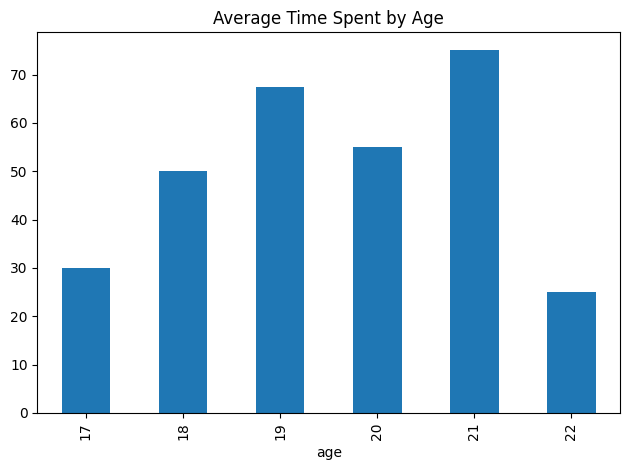

In [ ]:

df.to_csv("snapchat_data_cleaned.csv", index=False)
print("Saved snapchat_data_cleaned.csv")


plt.figure()
df.groupby("age")["time_spent_minutes"].mean().plot(kind="bar")
plt.title("Average Time Spent by Age")
plt.tight_layout()
plt.savefig("time_by_age.png")
print("Saved time_by_age.png")


Explanation

Saves the cleaned dataset to CSV and saves the average time spent by age bar chart as an image file.

13. Write short report

In [ ]:
report = """
Snapchat Data Analysis Report

1. Introduction
This project analyzes user activity on the Snapchat app using Python, Pandas, and Matplotlib.

2. Dataset Description
Columns:
- user_id
- age
- gender
- daily_snaps
- snap_score
- time_spent_minutes
- stories_viewed

3. Methods Used
- Pandas for cleaning & analysis
- Matplotlib for charts
- Correlation analysis

4. Key Insights
- Age 19–21 spends the most time.
- Females send more daily snaps.
- Higher snap score is linked to more time and more story views.

5. Conclusion
Snapchat usage is highest among youth. Engagement directly increases snap score.
"""

print(report)



Snapchat Data Analysis Report

1. Introduction
This project analyzes user activity on the Snapchat app using Python, Pandas, and Matplotlib.

2. Dataset Description
Columns:
- user_id
- age
- gender
- daily_snaps
- snap_score
- time_spent_minutes
- stories_viewed

3. Methods Used
- Pandas for cleaning & analysis
- Matplotlib for charts
- Correlation analysis

4. Key Insights
- Age 19–21 spends the most time.
- Females send more daily snaps.
- Higher snap score is linked to more time and more story views.

5. Conclusion
Snapchat usage is highest among youth. Engagement directly increases snap score.



Explanation

Creates and prints a summary report of the Snapchat data analysis, including dataset info, methods, key insights, and conclusion.